In [9]:
library(knitr)
## Global options
options(max.print="75")
opts_chunk$set(echo=TRUE,
	             cache=FALSE,
               prompt=FALSE,
               tidy=TRUE,
               comment=NA,
               message=FALSE,
               warning=TRUE)
opts_knit$set(width=75)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Descriptive analysis of our dataset

## Global analysis of the dataset

We start the project with a descriptive analysis of our dataset to see what are the main properties of this dataset. 
This dataset correponds to the mixture of different components that are contained in a glass. Those $n$ components are our quantitative explanatory variables such that $\sum_{i=1}^n x_i =1$. From this composition, we analyse the viscosity of the glass so it is our quantitative response variable. 

In [4]:
glass<-read.csv("visco.csv")
attach(glass)
head(glass)

Num Origin   Year visco..dPa.s..à.1200.C..from.VFT. X__1 X__2 X__3 X__4 X__5
1 18  VERA     2008 2430                              0    0.00 0    9.42 0   
2 22  VERA     2008 4433                              0    0.00 0    9.42 0   
3 43  VERA     2008   25                              0    0.39 0    3.58 0   
4 44  VERA     2008   17                              0    0.00 0    3.33 0   
5 45  VERA     2008   21                              0    0.00 0    3.81 0   
6 314 SCIGLASS 1955   64                              0    0.00 0    0.00 0   
  X__6 ⋯ X__174 X__175 X__176 X__177 X__178 X__179 X__180 X__181 X__182 X__183
1 0    ⋯ 0      0      0      0      0      0      0      0      0      0     
2 0    ⋯ 0      0      0      0      0      0      0      0      0      0     
3 0    ⋯ 0      0      0      0      0      0      0      0      0      0     
4 0    ⋯ 0      0      0      0      0      0      0      0      0      0     
5 0    ⋯ 0      0      0      0      0      0      0      0      0      0     
6 0    ⋯ 0      0      0      0      0      0      0      0      0      0

In [11]:
data_visco<-glass[, c(-1:-3)]

In [13]:
head(data_visco)
dim(data_visco)

visco..dPa.s..à.1200.C..from.VFT. X__1 X__2 X__3 X__4 X__5 X__6 X__7 X__8 
1 2430                              0    0.00 0    9.42 0    0    0     8.52
2 4433                              0    0.00 0    9.42 0    0    0     8.53
3   25                              0    0.39 0    3.58 0    0    0    14.25
  X__9 ⋯ X__174 X__175 X__176 X__177 X__178 X__179 X__180 X__181 X__182 X__183
1 0    ⋯ 0      0      0      0      0      0      0      0      0      0     
2 0    ⋯ 0      0      0      0      0      0      0      0      0      0     
3 0    ⋯ 0      0      0      0      0      0      0      0      0      0     
 [ getOption("max.print") est atteint -- 3 lignes omises ]

[1] 7247  184

The original data set is composed of 7247 different type of glass' mmixture and there are 184 different composents of glass such that we have 184 explanatory variables. 

In [14]:
data_visco %>% 
  rename(
    vis = visco..dPa.s..à.1200.C..from.VFT.
    )

vis  X__1 X__2 X__3 X__4  X__5 X__6 X__7 X__8  X__9 ⋯ X__174 X__175 X__176
1    2430 0    0.00 0     9.42 0    0    0     8.52 0    ⋯ 0      0      0     
2    4433 0    0.00 0     9.42 0    0    0     8.53 0    ⋯ 0      0      0     
3      25 0    0.39 0     3.58 0    0    0    14.25 0    ⋯ 0      0      0     
     X__177 X__178 X__179 X__180 X__181 X__182 X__183
1    0      0      0      0      0      0      0     
2    0      0      0      0      0      0      0     
3    0      0      0      0      0      0      0     
 [ getOption("max.print") est atteint -- 58 lignes omises ]

In [77]:
data_visco= subset(data_visco, select = c(colMeans(data_visco) !=0))

## Verification of the properties of our dataset

We are checking that we have corret mixtures for all the glasses in the dataset, so that $\sum_{i=1}^n x_i =1$

In [78]:
Mixture<-function(x){ #We great a function that is returning th vector of the lines of our dataset such that the sum of the composents is different from 1
    X<-as.matrix(x)
    X<-X[, -1]
    r<-c()
    for (i in 1:dim(X)[1]){
        cond<- sum(X[i, ])
        if (cond<99.8 | cond>100.2){
            r<-cbind(r, i)
        }
    }
    return (r)
}

In [79]:
Mixture(data_vis)

i  i   i   i   i   i   i   i   i   i   ⋯ i    i    i    i    i    i   
[1,] 33 260 261 262 293 294 321 479 480 530 ⋯ 7234 7235 7236 7237 7239 7240
     i    i    i    i   
[1,] 7241 7242 7243 7244

In [80]:
for (i in 1:length(Mixture(data_vis))){
    print(sum(data_vis[Mixture(data_vis)[i], -1]))
}

[1] 99.4
[1] 99.69
[1] 99.69
[1] 99.69
[1] 99.79
[1] 99.74
[1] 99.72
[1] 99.78
[1] 99.68
[1] 100.27
[1] 99.78
[1] 99.78
[1] 99.77
[1] 99.78
[1] 99.78
[1] 99.77
[1] 99.77
[1] 99.78
[1] 99.77
[1] 99.77
[1] 99.78
[1] 99.77
[1] 99.78
[1] 99.78
[1] 99.77
[1] 99.78
[1] 99.78
[1] 99.77
[1] 99.78
[1] 99.77
[1] 99.78
[1] 99.79
[1] 99.77
[1] 99.77
[1] 99.77
[1] 99.78
[1] 99.77
[1] 99.78
[1] 99.78
[1] 99.68
[1] 99.78
[1] 99.77
[1] 99.77
[1] 99.78
[1] 99.78
[1] 99.78
[1] 99.78
[1] 99.77
[1] 99.77
[1] 99.77
[1] 99.78
[1] 99.77
[1] 99.76
[1] 99.78
[1] 99.57
[1] 99.77
[1] 99.77
[1] 99.76
[1] 99.66
[1] 99.7
[1] 99.7
[1] 99.66
[1] 99.7
[1] 99.65
[1] 99.71
[1] 99.5
[1] 99.79
[1] 99.67
[1] 99.58
[1] 99.5
[1] 99.55
[1] 99.59
[1] 99.55
[1] 99.61
[1] 99.61
[1] 99.63
[1] 99.61
[1] 99.62
[1] 99.61
[1] 99.5
[1] 99.66
[1] 99.45
[1] 99.48
[1] 99.45
[1] 99.71
[1] 99.58
[1] 99.39
[1] 99.41
[1] 99.5
[1] 99.681
[1] 99.7
[1] 99.68
[1] 99.68
[1] 99.67
[1] 99.6
[1] 99.31
[1] 99.5
[1] 99.5
[1] 99.59
[1] 99.49
[1] 99.47


We notice that there are a lot of variables for which the sum of the components is not equal to 100%. So we can say that there some missing data for the explanatory variables or wrong data as the sum of components is sometimes bigger than 100%

##  Descriptive analysis

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.000e+00 1.880e+02 1.103e+03 2.729e+10 7.073e+03 3.090e+13 

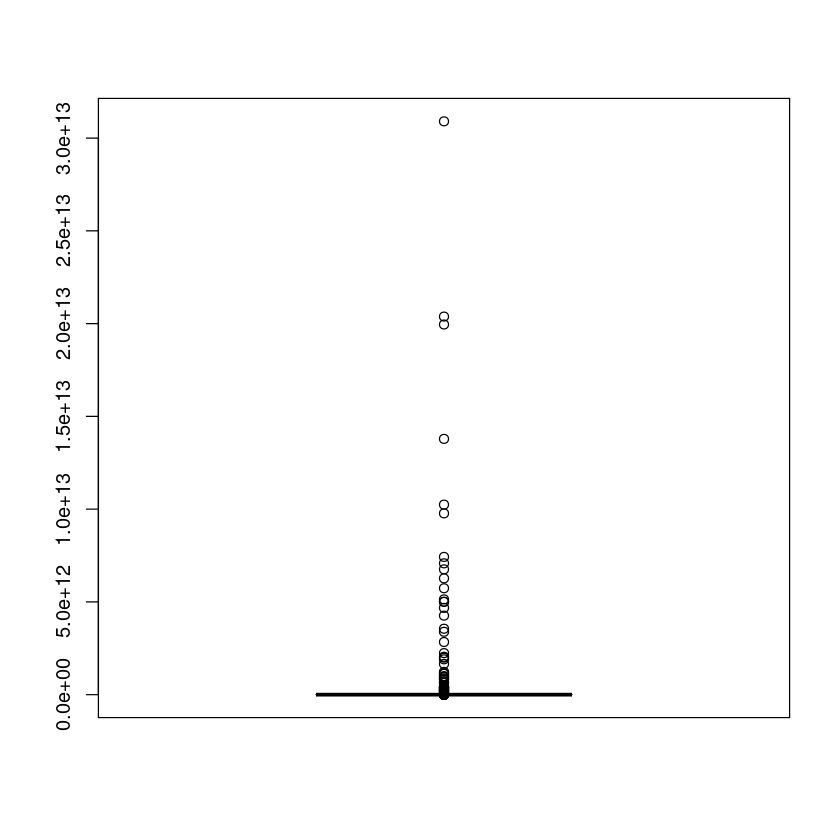

In [82]:
summary(data_visco$vis)
boxplot(data_visco$vis)

We observe that we have a very wide interval of data going from 1 to $10^{13}$ with a median of 1103 Pa.s and a mean of $2.720.10^{10}$. From the bosplot we see that there is lot of outliers with very high that are very influential in the distribution of our viscosity. It is sureprising to have such high viscosities for glass. 

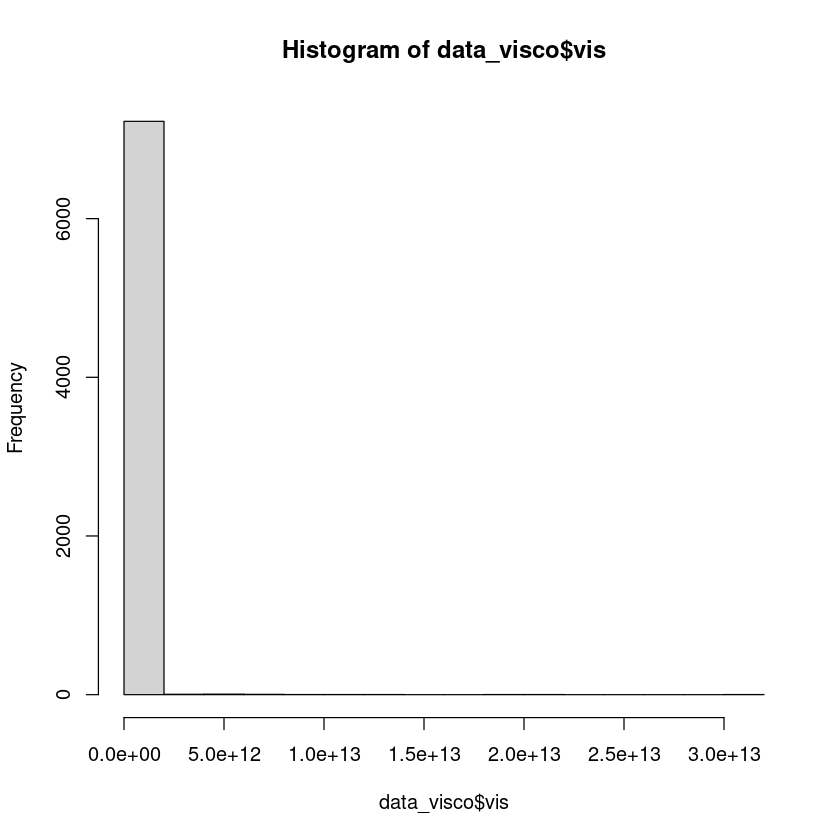

In [83]:
hist(data_visco$vis)

Indeed, we can see on this boxplot that we have a very large amount of variables that are concentrated in smaller values of viscosity. So there are not many outliers but there are very influential in our model. 

We are going to analyse our dataset hile not considering some very high values of viscosity.

In [84]:
new_data<- subset(data_visco, data_visco$vis<=1e+9)
dim(new_data)

[1] 7189  116

In [85]:
summary(new_data$vis)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        1       184      1078    289832      6727 398107188 

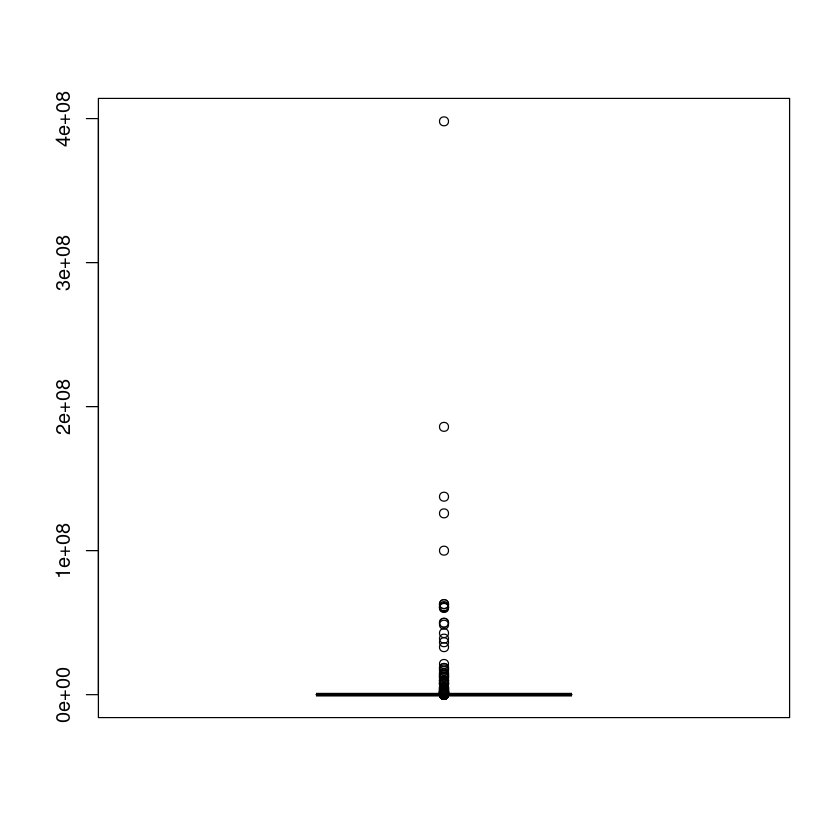

In [86]:
boxplot(new_data$vis)

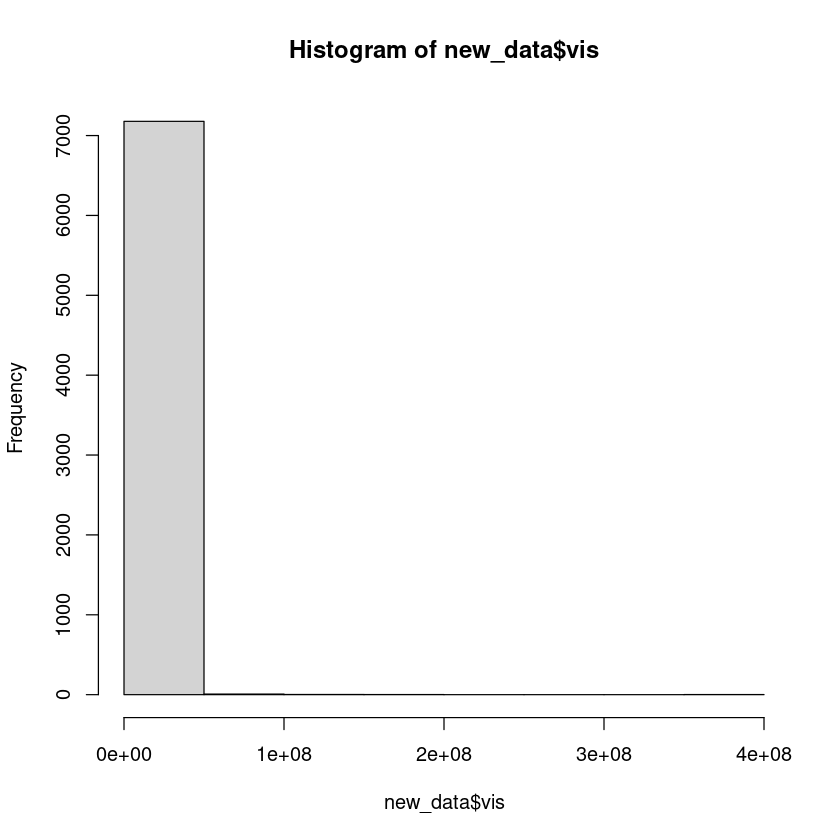

In [87]:
hist(new_data$vis)

The values of the viscosity is concentrated on the smaller values, so we try to consider the logarithm of the viscosity so that the viscosity follows more a gaussian.

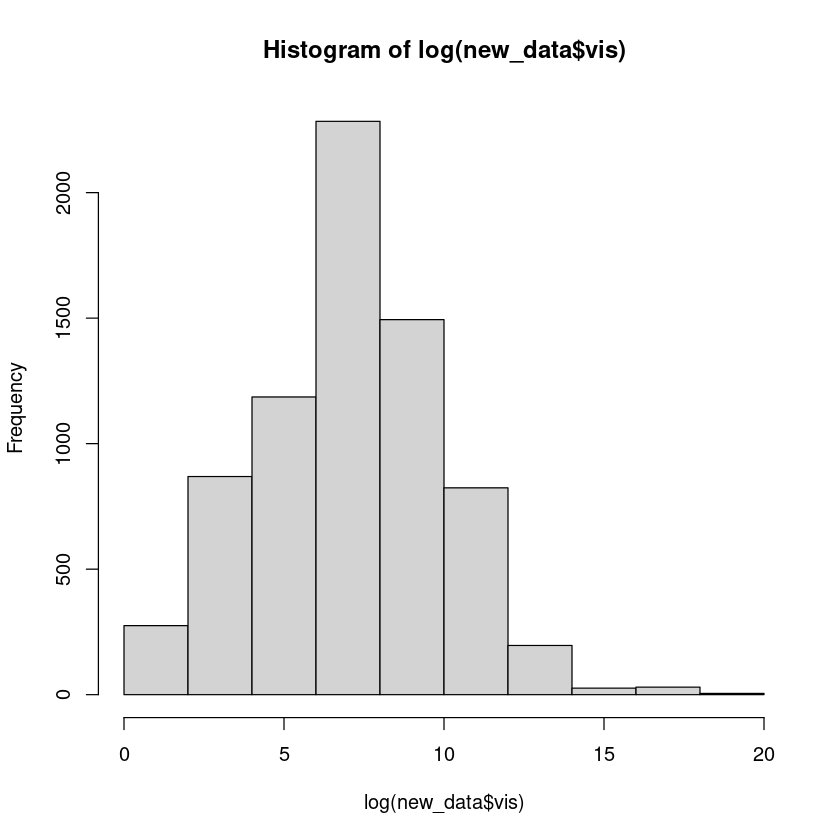

In [88]:
hist(log(new_data$vis))

For the rest of our analysis and our project, we are going to consider the logarithm of the viscosity

## ACP

In [89]:
options(repr.plot.width = 80, repr.plot.height = 80)
boxplot(new_data[, -1])

More precisely : 

In [92]:
par(mfrow=c(2,2))
boxplot(new_data[, 2:30])
boxplot(new_data[, 31:60])
boxplot(new_data[, 61:90])
boxplot(new_data[, 91:116])


We can see that there are some explantory variables that are very spaced with wide intervals where the mean is far from 0. However for most of the variables, their mean are very close to 0 and there are a lot of outliers. 

In [93]:
library(corrplot)
corrplot(cor(new_data[,-1]))

corrplot 0.92 loaded

Warning message in cor(new_data[, -1]):
“l'écart type est nul”


We can see that there are some variables that are very positively correlated. But most of the variables are not correlated to each other.

In [94]:
library(FactoMineR)

In [95]:
acp<-PCA(new_data[,-1], scale.unit=T, graph=F, quali.sup = 1, quanti.sup=2, ncp=7)

In [98]:
par(mfrow=c(2,1))
barplot(acp$eig[,2],ylab = "Percentage", main = "Proportion of inertia")
boxplot(acp$ind$coord, main = "Coordinates of individuals ")

In [107]:
print(acp$eig)

           eigenvalue percentage of variance cumulative percentage of variance
comp 1   5.177220e+00           4.664162e+00                          4.664162
comp 2   3.831714e+00           3.451994e+00                          8.116156
comp 3   2.606928e+00           2.348584e+00                         10.464740
comp 4   2.498402e+00           2.250813e+00                         12.715553
comp 5   2.379236e+00           2.143455e+00                         14.859008
comp 6   2.294048e+00           2.066710e+00                         16.925718
comp 7   2.180981e+00           1.964848e+00                         18.890566
comp 8   1.950511e+00           1.757217e+00                         20.647784
comp 9   1.872048e+00           1.686530e+00                         22.334313
comp 10  1.815880e+00           1.635928e+00                         23.970242
comp 11  1.719698e+00           1.549278e+00                         25.519519
comp 12  1.643711e+00           1.480821e+00        

We see that the the first to composants are explaining the most our model but onmy with 4.6% for the first composant and 3.5% for the second one. We also see that if we consider the first 25 components we only explain 41% of the global inertia. So the components do not explain much our model. 

Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_text).”


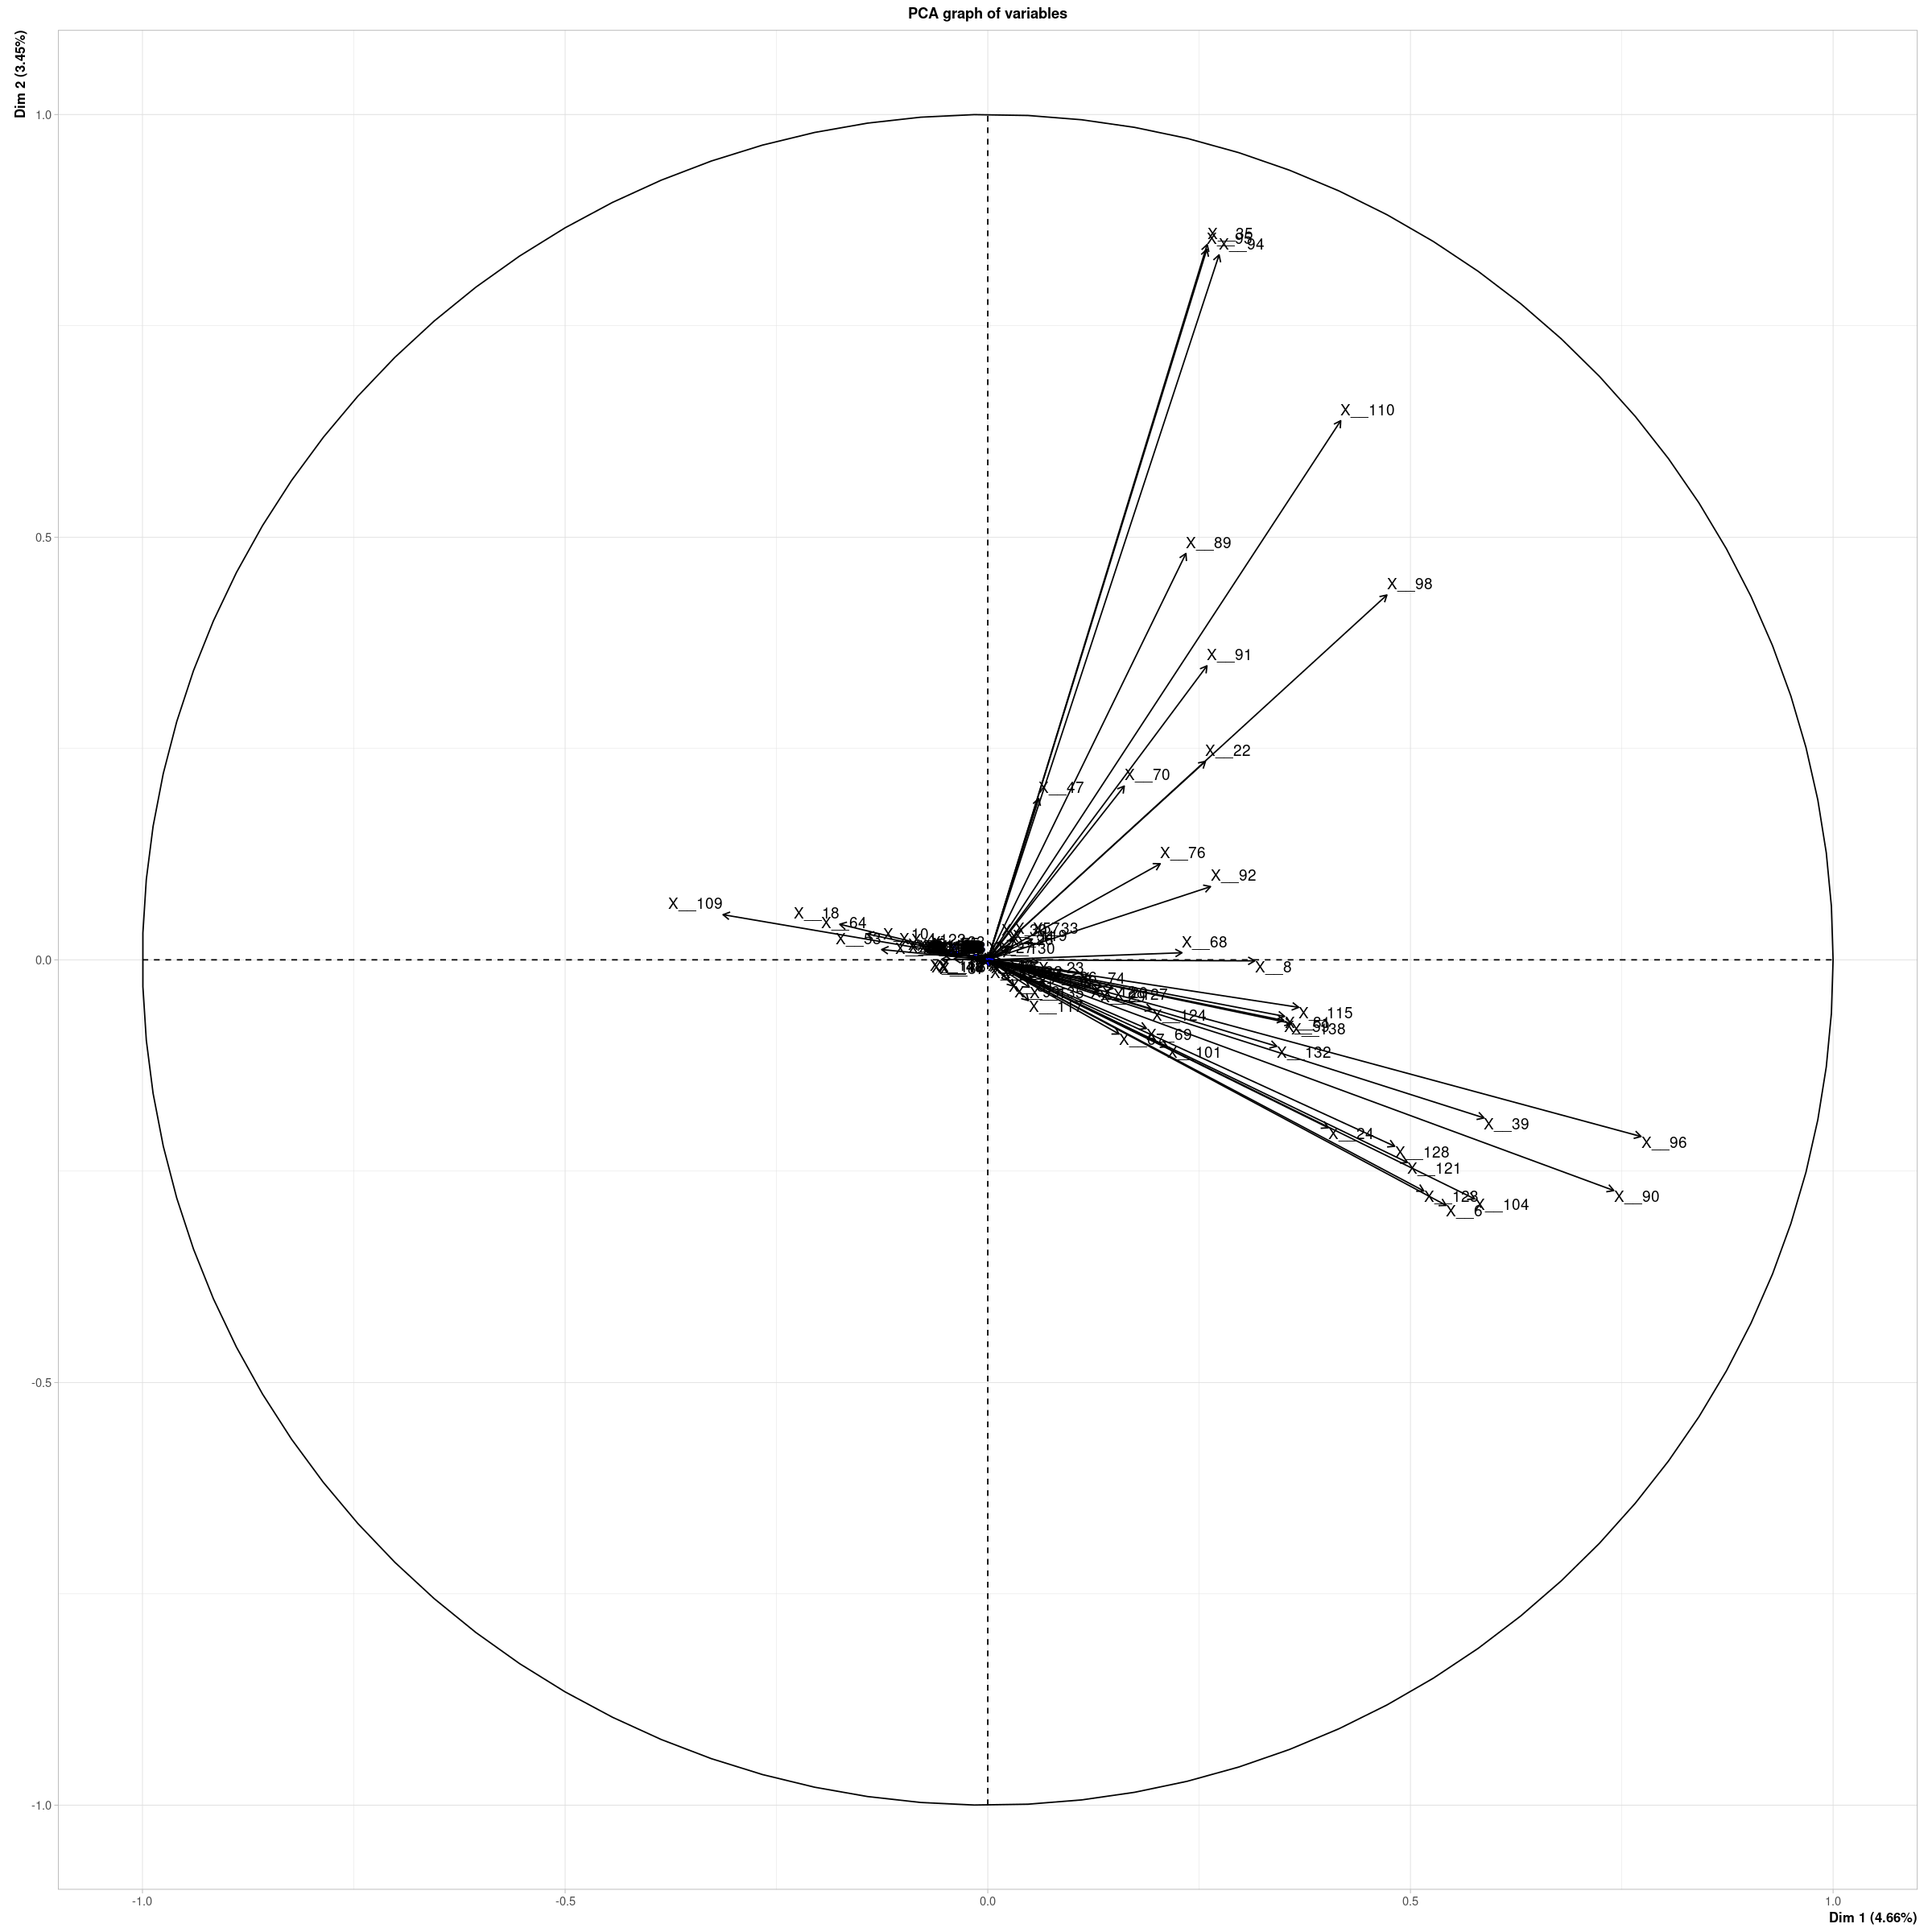

In [103]:
options(repr.plot.width = 20, repr.plot.height = 20)
plot(acp, choix="varcor")

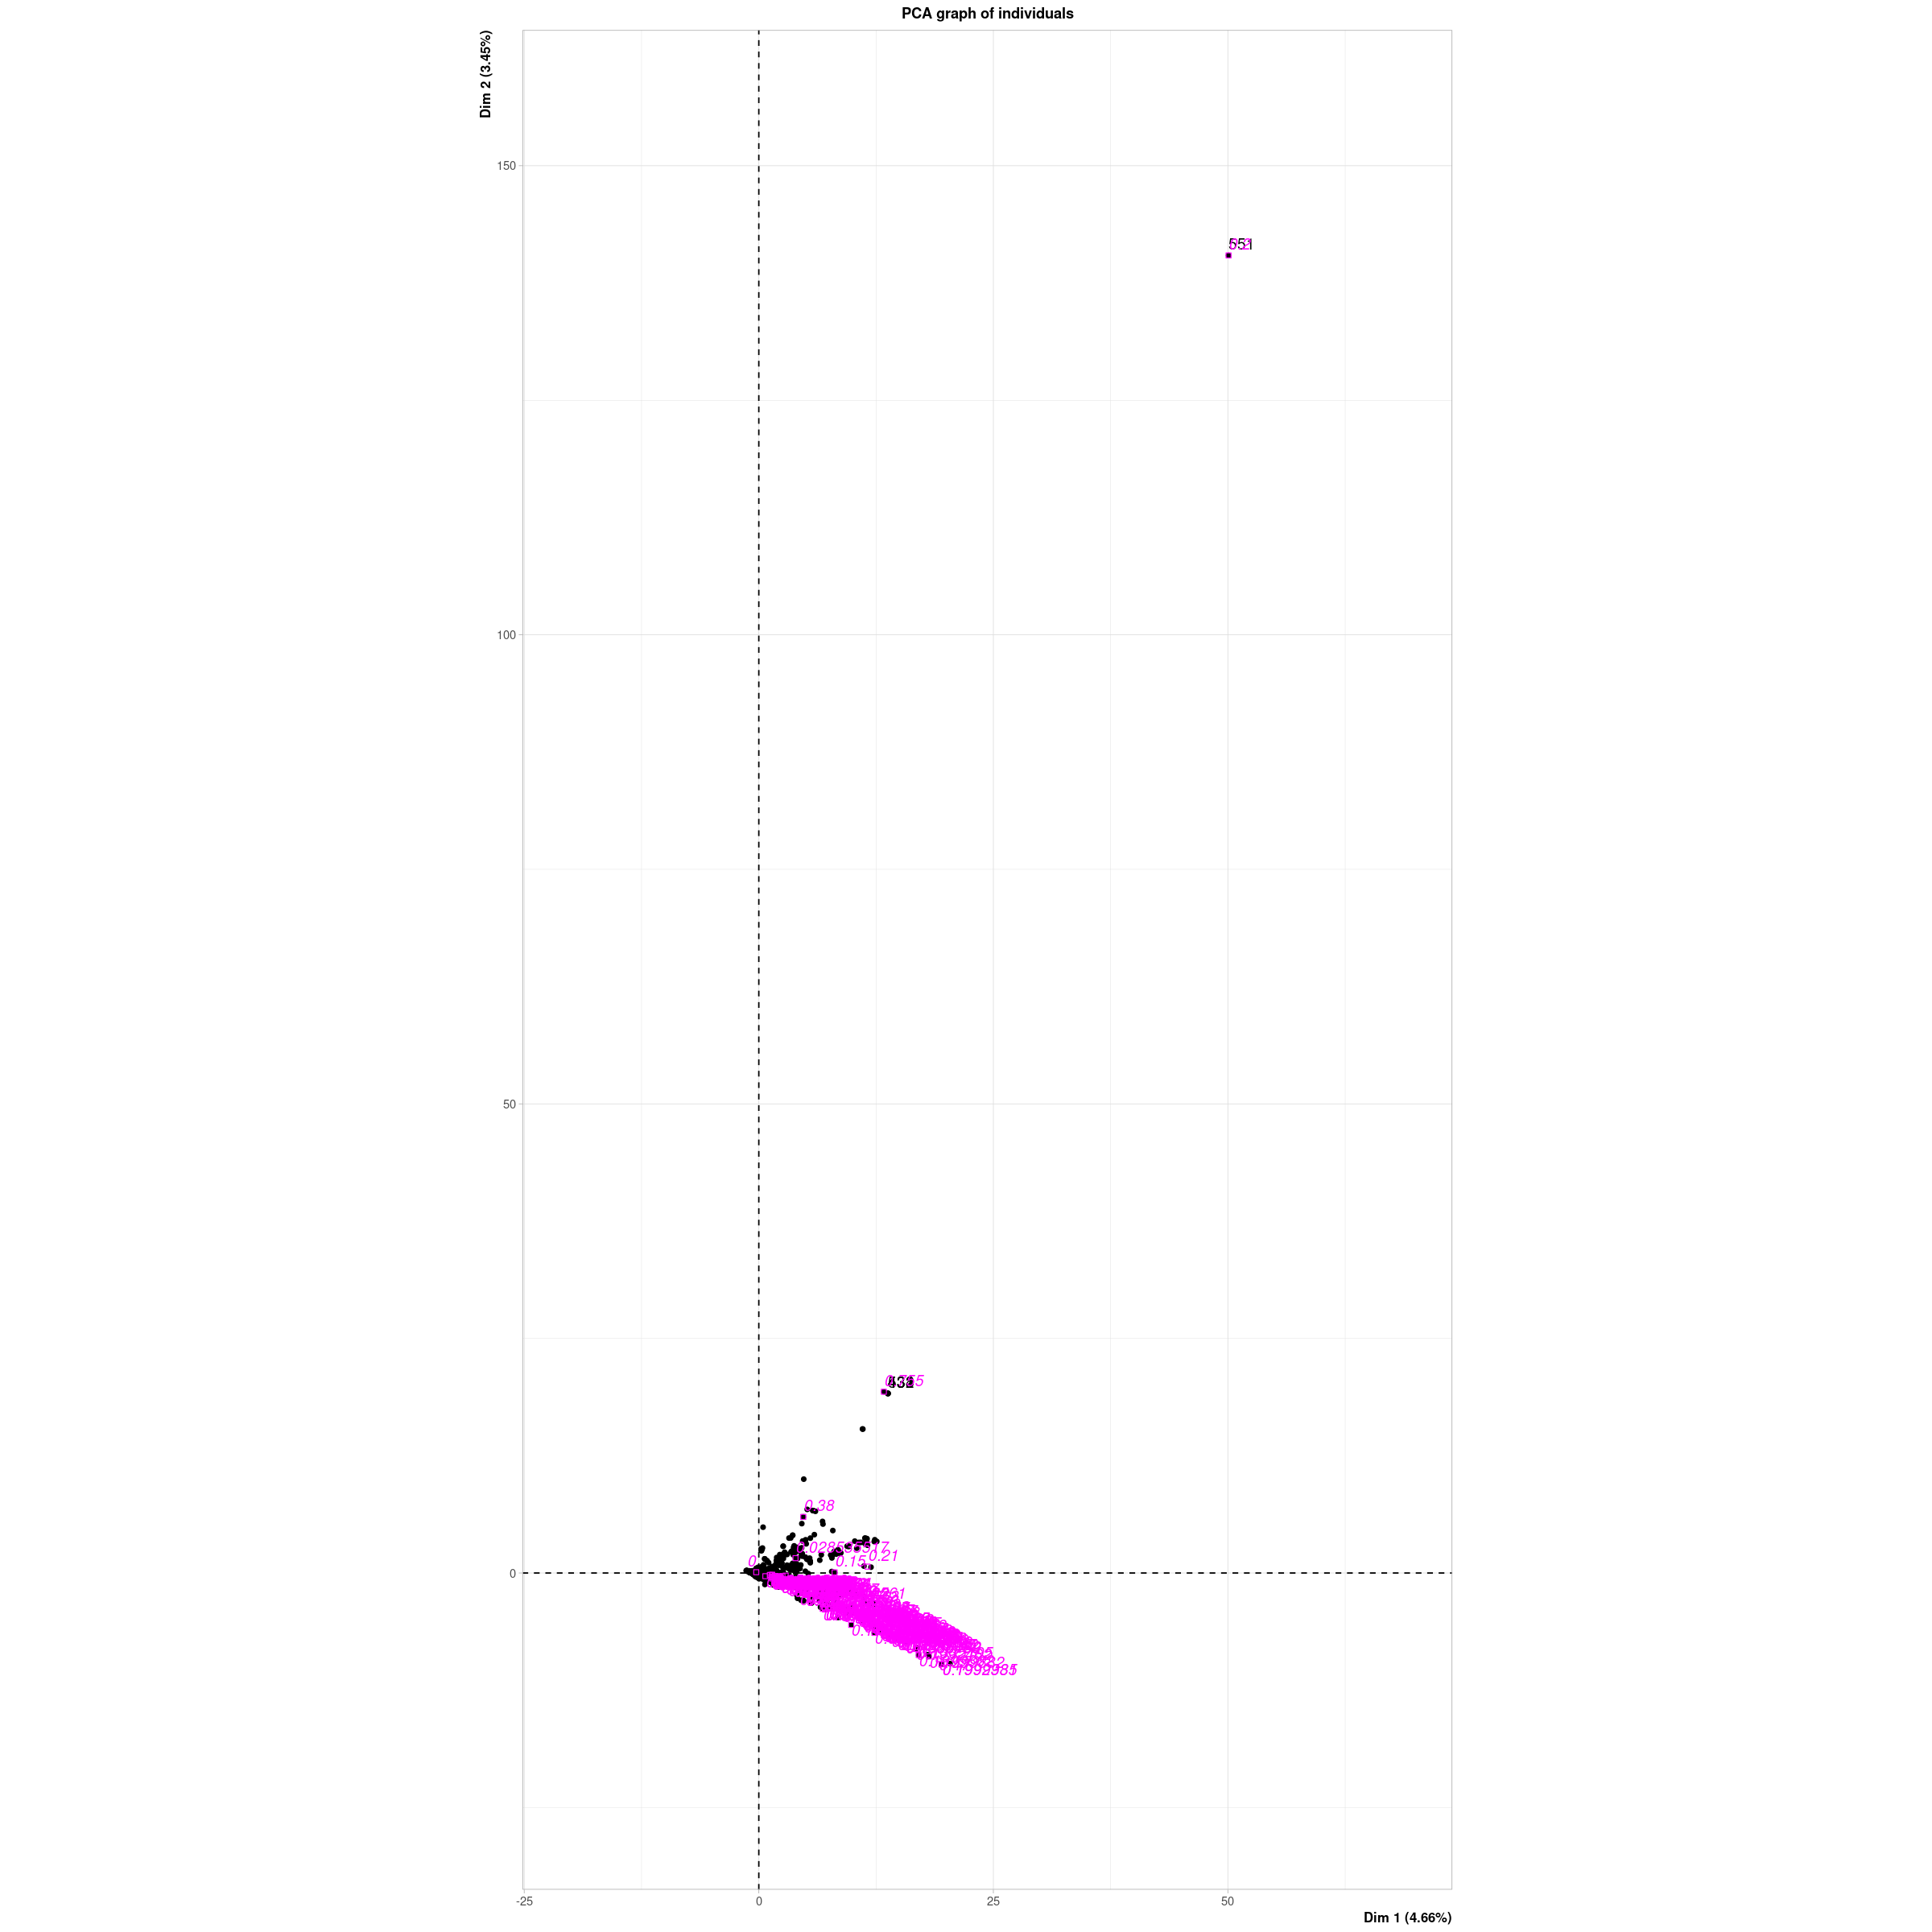

In [104]:
options(repr.plot.width = 20, repr.plot.height = 20)
plot(acp, choix="ind", select = "contrib 5", unselect=0)

The graph of variance/covariance shows that there are not a lot of correlation between our explanatory variables and first two components. The graph of individuals also shows that there is no notable observations that explain our model.